In [43]:
# Step 1: Load the Data
import pandas as pd

# Load the CSV file
file_path = 'nls_emp_survey.csv'
survey_data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
survey_data.head()





,Response,Employee_ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,1,810081,6,3,5,4,3,6,5,3,5,4,6,4
1,2,512221,2,5,3,3,6,2,3,5,3,2,2,3
2,3,177541,3,2,3,5,2,3,3,2,3,6,3,6
3,4,679938,3,5,3,3,6,2,2,5,2,2,3,2
4,5,777934,3,5,3,5,6,4,4,5,4,6,3,5


In [44]:
# Step 2: Data Preprocessing - Standardization
from sklearn.preprocessing import StandardScaler

# Remove the 'Response' and 'Employee_ID' columns
survey_data_processed = survey_data.drop(columns=['Response', 'Employee_ID'])

# Standardize the data
scaler = StandardScaler()
survey_data_standardized = scaler.fit_transform(survey_data_processed)

# Convert the standardized data back to a DataFrame for easier handling
survey_data_standardized_df = pd.DataFrame(survey_data_standardized, columns=survey_data_processed.columns)

# Display the first few rows of the standardized data
survey_data_standardized_df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,2.199888,-0.353421,1.970580,-0.631364,-0.335061,1.490498,0.866717,-0.337699,1.016996,-0.818885,2.199888,-0.669245
1,-0.942809,0.943538,-0.179144,-1.745536,1.340245,-1.585336,-0.841100,1.185757,-0.872161,-2.143227,-0.942809,-1.538394
2,-0.157135,-1.001901,-0.179144,0.482808,-0.893497,-0.816378,-0.841100,-1.099428,-0.872161,0.505457,-0.157135,1.069053
3,-0.157135,0.943538,-0.179144,-1.745536,1.340245,-1.585336,-1.695008,1.185757,-1.816739,-2.143227,-0.157135,-2.407543
4,-0.157135,0.943538,-0.179144,0.482808,1.340245,-0.047419,0.012809,1.185757,0.072418,0.505457,-0.157135,0.199904


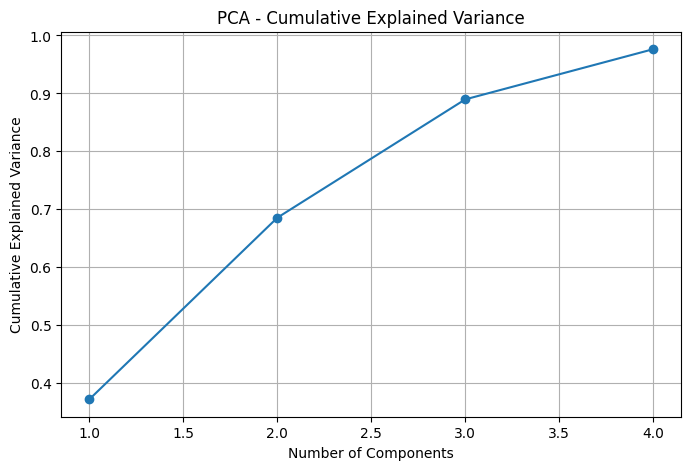

array([0.37229005, 0.31322782, 0.20418203, 0.0865742 ])

In [45]:
# Step 3: PCA Analysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define PCA model to retain components that explain 90% of variance
pca = PCA(n_components=0.9)
survey_data_pca = pca.fit_transform(survey_data_standardized_df)

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid()
plt.show()

# Display explained variance
explained_variance

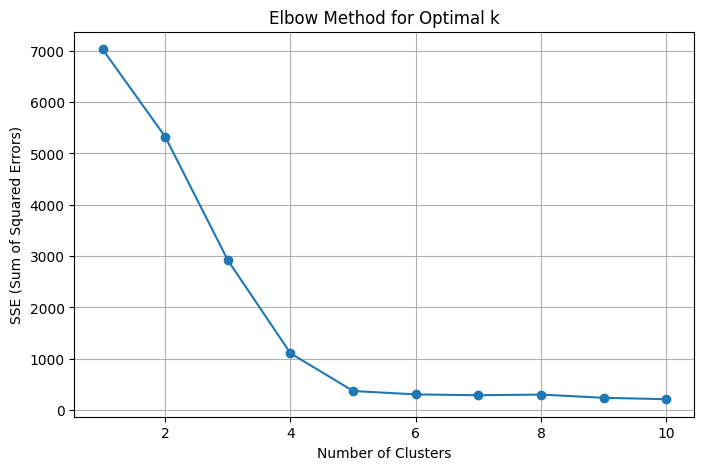

In [46]:
# Step 4: K-means Clustering Analysis
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Using the Elbow Method to determine the optimal number of clusters
sse = []  # List to store the Sum of Squared Errors (SSE) for each number of clusters

# Test cluster numbers from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(survey_data_pca)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()


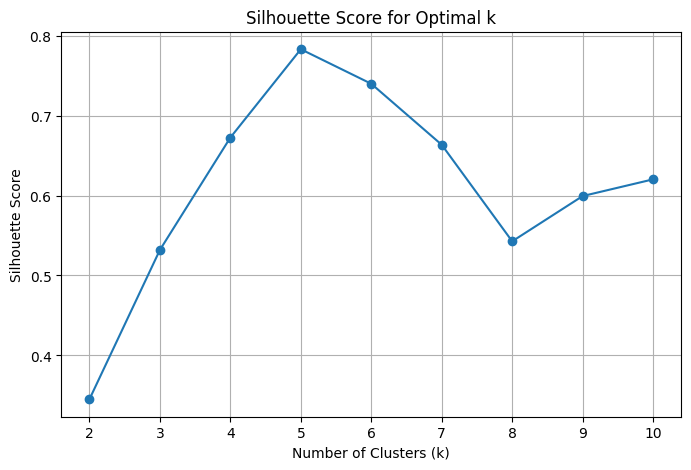

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define the range for the number of clusters (k)
k_range = range(2, 11)  # Start from 2 since silhouette score is undefined for k=1
silhouette_scores = []  # List to store silhouette scores for each k

# Calculate silhouette scores for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(survey_data_pca)  # Replace 'survey_data_pca' with your processed data variable
    silhouette_scores.append(silhouette_score(survey_data_pca, labels))

# Plot the Silhouette Score graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid()
plt.show()


In [48]:
# Step 5: Applying K-means with the chosen number of clusters
# According to the elbow rule, the optimal number of clusters obtained is 3
optimal_k = 5 

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(survey_data_pca)

# Add clustering results back to the original data
survey_data['Cluster'] = clusters

# View data containing clustering labels
survey_data.head()


,Response,Employee_ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Cluster
0,1,810081,6,3,5,4,3,6,5,3,5,4,6,4,2
1,2,512221,2,5,3,3,6,2,3,5,3,2,2,3,3
2,3,177541,3,2,3,5,2,3,3,2,3,6,3,6,0
3,4,679938,3,5,3,3,6,2,2,5,2,2,3,2,3
4,5,777934,3,5,3,5,6,4,4,5,4,6,3,5,1


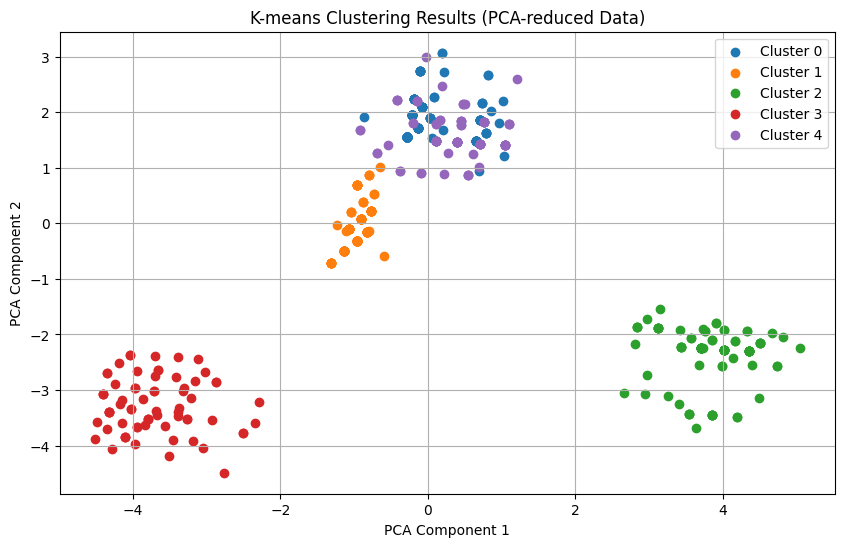

In [49]:
# Step 6: visualization of clusters
import matplotlib.pyplot as plt

# Extract the first two principal components for two-dimensional visualization
pca_2d = survey_data_pca[:, :2]

# Create a scatter plot to display clustering results
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    plt.scatter(
        pca_2d[clusters == cluster, 0], 
        pca_2d[clusters == cluster, 1], 
        label=f'Cluster {cluster}'
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering Results (PCA-reduced Data)')
plt.legend()
plt.grid()
plt.show()


In [50]:
# Step 7: Analyze Cluster Characteristics
# Calculate the mean score for each question (Q1 to Q12) within each cluster

# Group by 'Cluster' and calculate the mean for each question
cluster_means = survey_data.groupby('Cluster').mean()

# Display the mean scores of each cluster to understand their characteristics
cluster_means


,Response,Employee_ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
Cluster,,,,,,,,,,,,,,
0,310.825,528716.070000,3.000000,1.945000,3.010000,5.055,1.775000,3.190,3.190000,2.000000,3.205000,6.115000,3.000000,5.370000
1,309.140,542586.486667,3.000000,5.406667,3.006667,5.080,5.806667,4.000,4.000000,5.053333,4.000000,6.140000,3.000000,5.406667
2,274.420,509960.200000,5.790000,2.890000,5.050000,3.830,2.740000,5.830,5.530000,2.990000,5.270000,3.760000,5.790000,3.830000
3,290.000,501924.414286,2.157143,5.457143,2.600000,2.600,5.800000,2.200,2.328571,5.042857,2.385714,1.957143,2.157143,2.342857
4,300.275,491694.012500,1.750000,3.200000,2.000000,5.025,3.175000,5.775,5.462500,3.200000,5.237500,6.062500,1.750000,5.375000


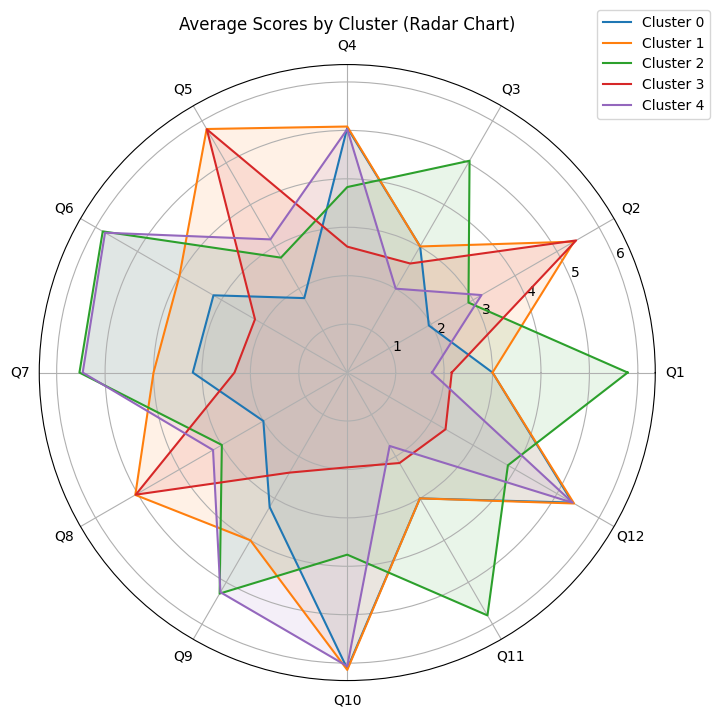

In [51]:
# Step 8: Visualize Cluster Characteristics with Radar Chart
import matplotlib.pyplot as plt
import numpy as np

# Filter out 'Employee_ID' and 'Response' columns for the radar chart
cluster_means_filtered = cluster_means.drop(columns=['Employee_ID', 'Response'])

# Set up the Radar Chart for cluster characteristics
num_vars = len(cluster_means_filtered.columns)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the radar chart loop

# Plot each cluster's average scores as a separate radar chart line
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Loop through each cluster and plot its characteristics
for index, (cluster, row) in enumerate(cluster_means_filtered.iterrows()):
    values = row.values.flatten().tolist()
    values += values[:1]  # Repeat the first value to close the circle
    ax.plot(angles, values, label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.1)

# Configure the radar chart appearance
ax.set_xticks(angles[:-1])
ax.set_xticklabels(cluster_means_filtered.columns)
plt.title('Average Scores by Cluster (Radar Chart)')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()


In [52]:
# Assuming 'survey_data_standardized_df' is your processed data after standardization
# and 'kmeans' is your fitted K-means model

# Predict clusters for each employee
clusters = kmeans.predict(survey_data_pca)  # Replace with your data variable

# Add the cluster labels as a new column in the original dataframe
survey_data['Cluster'] = clusters

# Display the updated dataframe with the new 'Cluster' column
survey_data.head()
survey_data.to_csv('survey_data.csv', index=False)


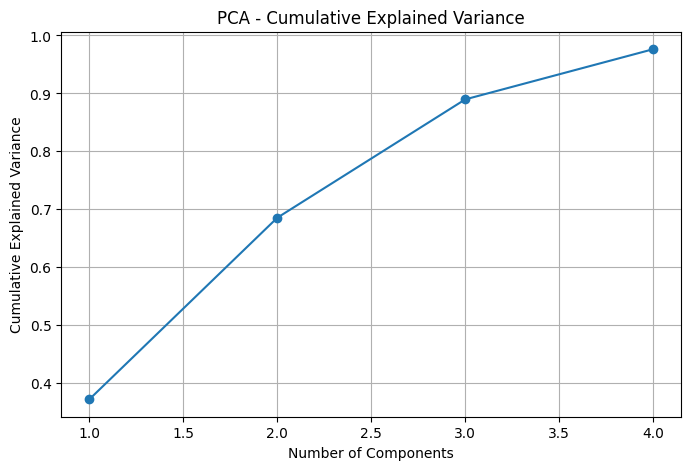

Number of components retained: 4
Explained variance by each component: [0.37229005 0.31322782 0.20418203 0.0865742 ]
Cumulative explained variance: 0.9762741074477246


In [53]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Standardize the data (if not already standardized)
# Assuming 'survey_data_processed' is the original data without 'Response' and 'Employee_ID'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
survey_data_standardized = scaler.fit_transform(survey_data_processed)

# Step 2: Apply PCA and keep enough components to explain at least 90% of the variance
pca = PCA(n_components=0.9)  # Retain components that explain 90% of the variance
survey_data_pca = pca.fit_transform(survey_data_standardized)

# Step 3: Plot the cumulative explained variance to see how many components are kept
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid()
plt.show()

# Display the number of components used and the explained variance
print(f"Number of components retained: {pca.n_components_}")
print(f"Explained variance by each component: {explained_variance_ratio}")
print(f"Cumulative explained variance: {cumulative_variance[-1]}")


Principal Component 1: 37.23% of variance explained
Principal Component 2: 31.32% of variance explained
Principal Component 3: 20.42% of variance explained
Principal Component 4: 8.66% of variance explained
Principal Component 5: 0.70% of variance explained
Principal Component 6: 0.42% of variance explained
Principal Component 7: 0.33% of variance explained
Principal Component 8: 0.28% of variance explained
Principal Component 9: 0.24% of variance explained
Principal Component 10: 0.21% of variance explained
Principal Component 11: 0.19% of variance explained
Principal Component 12: 0.00% of variance explained


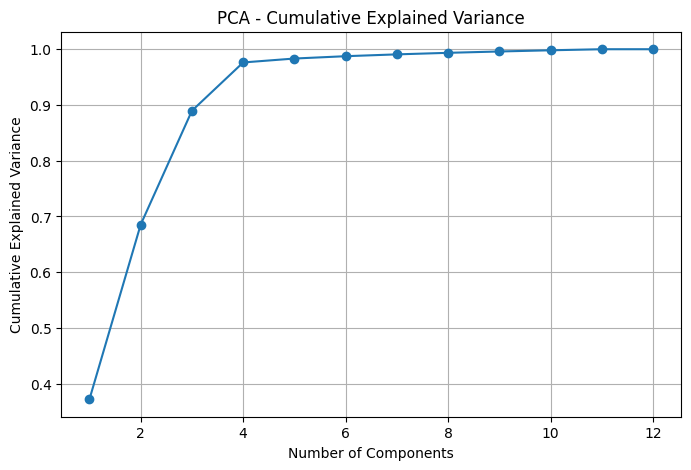

Loadings for the first 4 principal components:
          PC1       PC2       PC3       PC4
Q1   0.377841 -0.224249 -0.115196  0.357202
Q2  -0.253190 -0.276803  0.383411  0.213789
Q3   0.351393 -0.251104 -0.138598  0.356234
Q4   0.072333  0.445143  0.198855  0.311536
Q5  -0.260122 -0.267763  0.382000  0.221837
Q6   0.366604 -0.029642  0.343320 -0.282507
Q7   0.361852 -0.033165  0.360231 -0.273266
Q8  -0.237301 -0.288001  0.393521  0.195376
Q9   0.355177 -0.024317  0.375288 -0.250666
Q10  0.043768  0.457583  0.195117  0.284303
Q11  0.377841 -0.224249 -0.115196  0.357202
Q12  0.065438  0.441593  0.200932  0.299368


In [54]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Standardize the data (if not already standardized)
# Assuming 'survey_data_processed' is the original data without 'Response' and 'Employee_ID'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
survey_data_standardized = scaler.fit_transform(survey_data_processed)

# Step 2: Apply PCA to get all 12 components
pca = PCA(n_components=12)
survey_data_pca = pca.fit_transform(survey_data_standardized)

# Step 3: Display the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Print explained variance for each component
for i, variance in enumerate(explained_variance_ratio, start=1):
    print(f"Principal Component {i}: {variance:.2%} of variance explained")

# Step 4: Visualize the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, 13), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid()
plt.show()

# Step 5: Examine the loadings (correlations between original features and principal components)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(12)], index=survey_data_processed.columns)

# Display loadings for the first 4 principal components
print("Loadings for the first 4 principal components:")
print(loadings.iloc[:, :4])


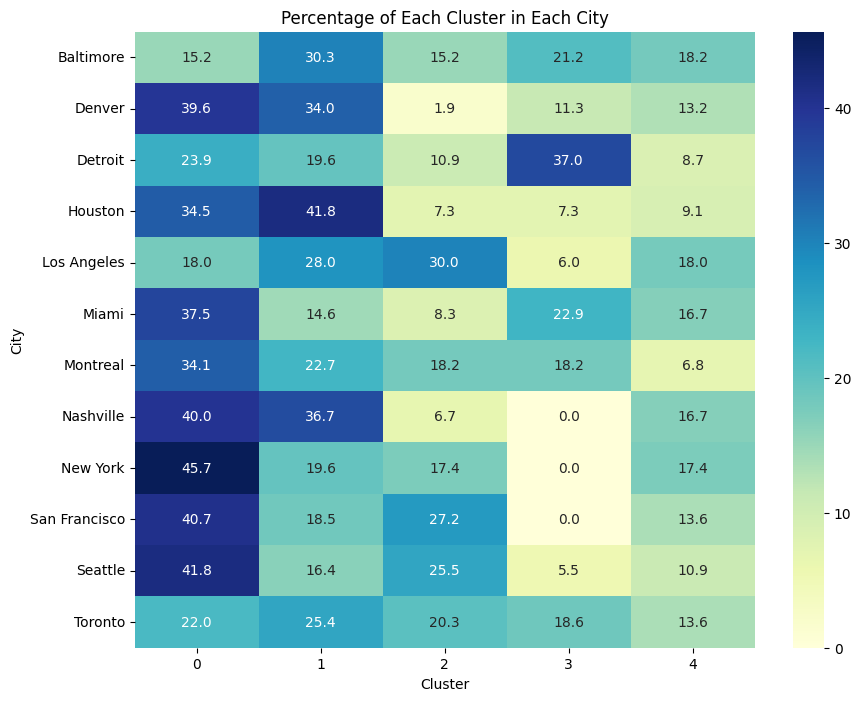

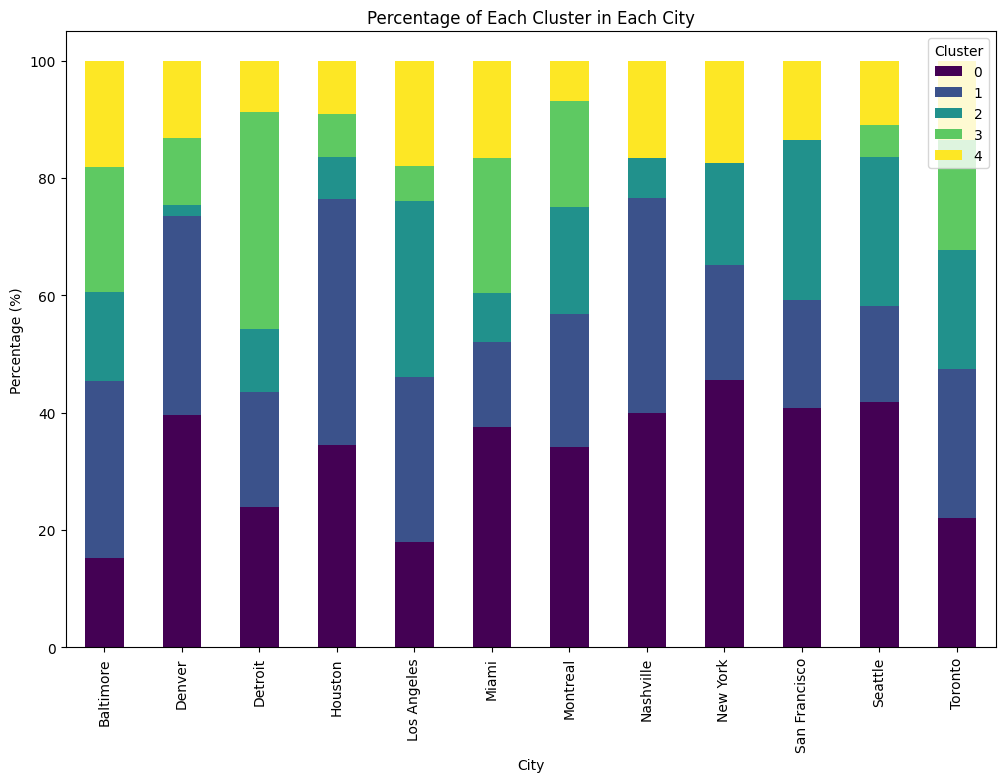

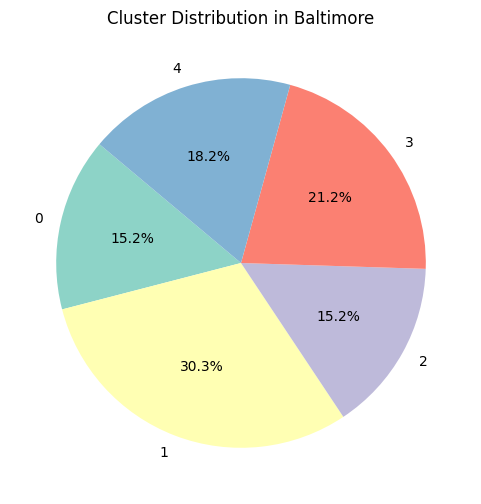

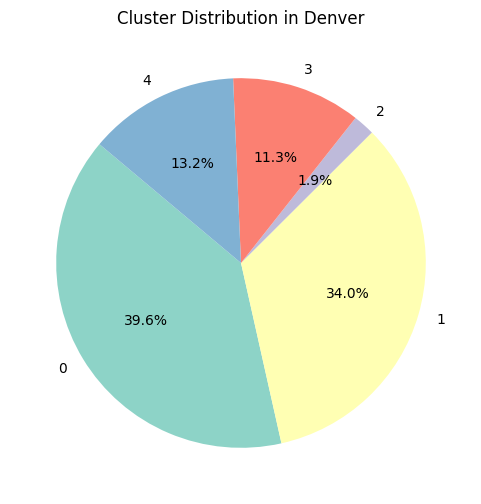

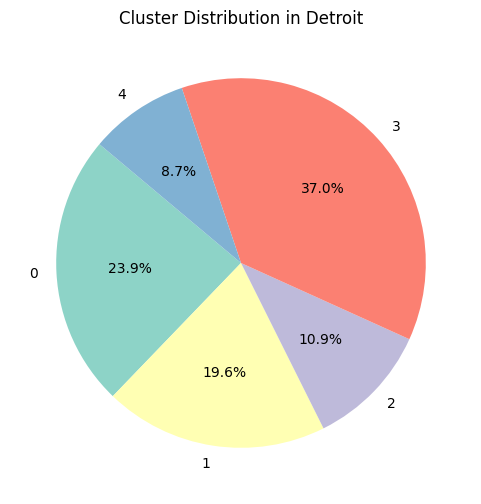

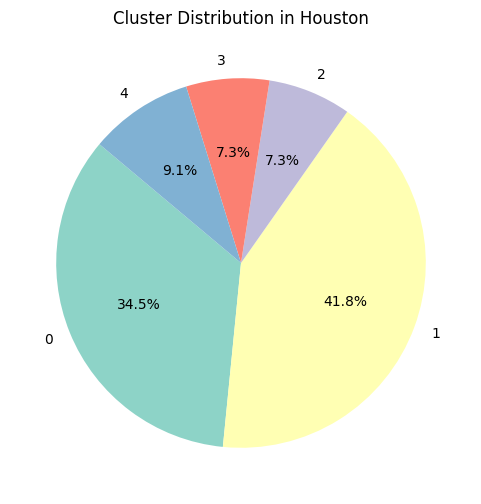

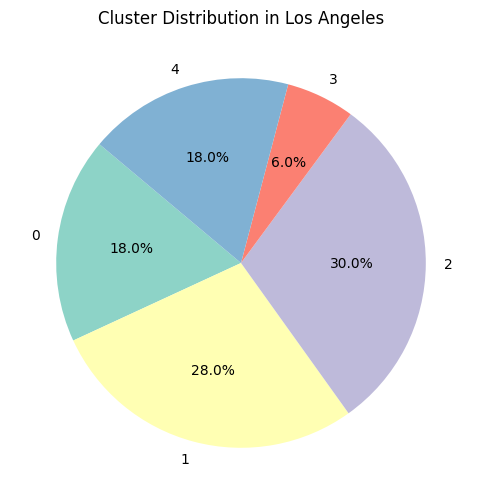

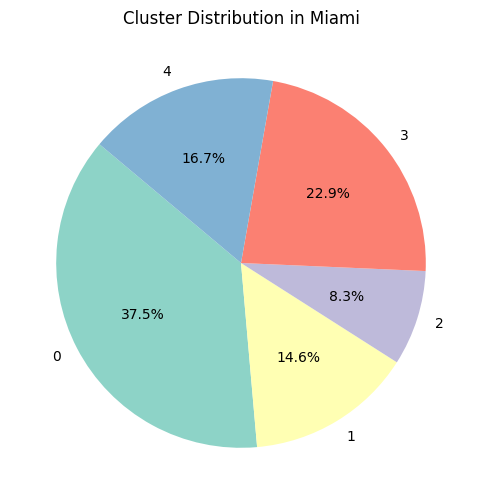

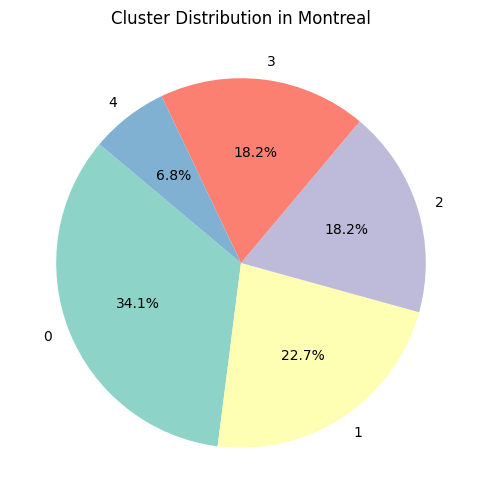

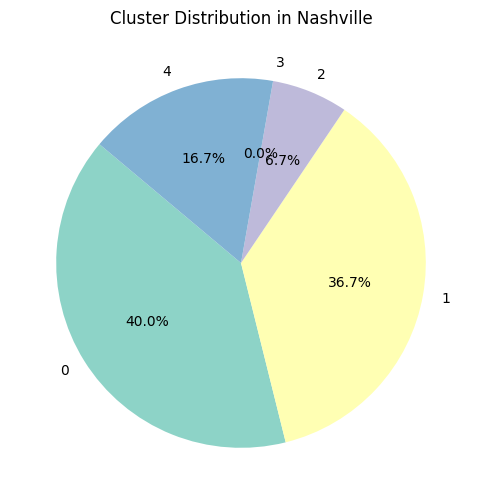

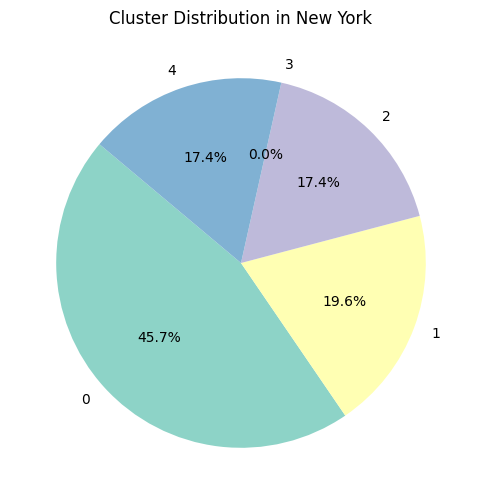

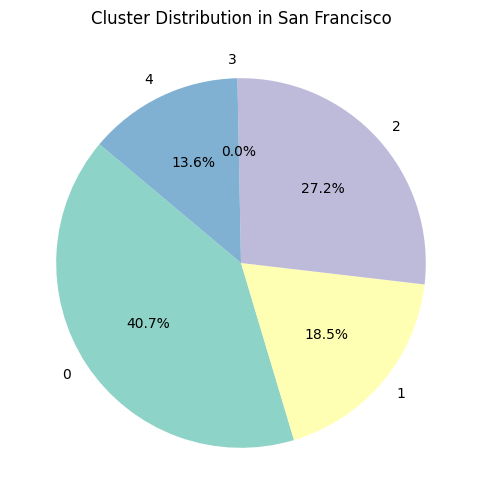

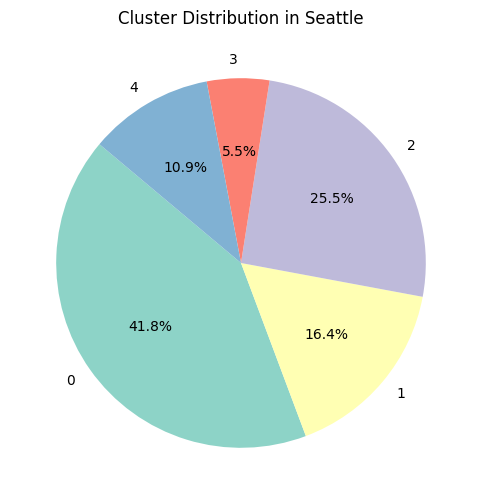

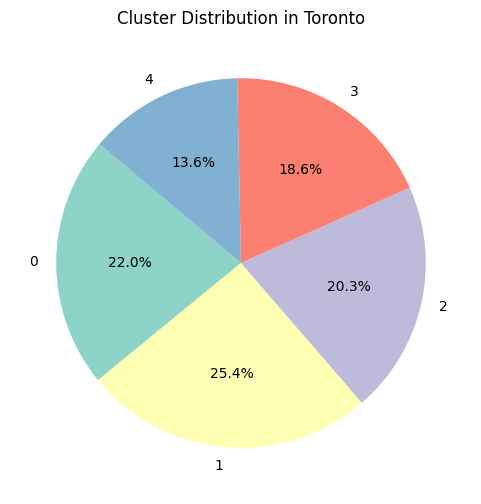

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: 加载数据
df = pd.read_csv("./clusters_locations.csv")

# Step 2: 计算每个城市中每个聚类的数量和占比
city_cluster_counts = df.groupby(['city', 'Cluster']).size().unstack(fill_value=0)
city_cluster_percentage = city_cluster_counts.div(city_cluster_counts.sum(axis=1), axis=0) * 100

# Step 3: 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(city_cluster_percentage, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Percentage of Each Cluster in Each City")
plt.xlabel("Cluster")
plt.ylabel("City")
plt.show()

# Step 4: 绘制分组柱状图
city_cluster_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), colormap="viridis")
plt.title("Percentage of Each Cluster in Each City")
plt.xlabel("City")
plt.ylabel("Percentage (%)")
plt.legend(title="Cluster")
plt.show()

# Step 5: 为每个城市绘制饼图
for city in city_cluster_percentage.index:
    plt.figure(figsize=(6, 6))
    plt.pie(city_cluster_percentage.loc[city], labels=city_cluster_percentage.columns, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
    plt.title(f"Cluster Distribution in {city}")
    plt.show()


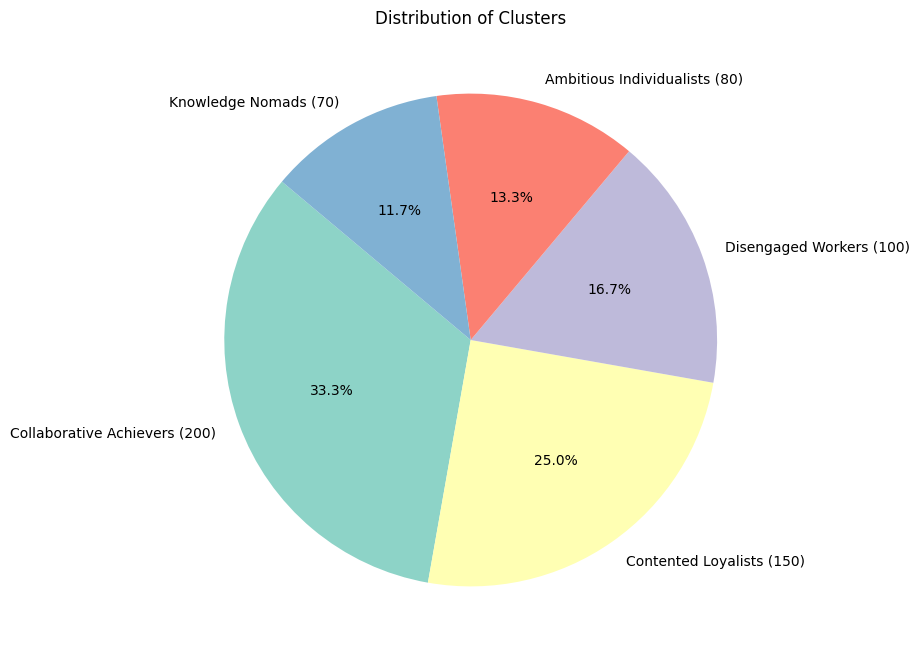

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
df = pd.read_csv("./clusters_locations.csv")

# 定义 Cluster 名称映射
cluster_names = {
    0: 'Collaborative Achievers',
    1: 'Contented Loyalists',
    2: 'Disengaged Workers',
    3: 'Knowledge Nomads',
    4: 'Ambitious Individualists'
}

# 替换 Cluster 列的值
df['Cluster'] = df['Cluster'].map(cluster_names)

# 计算每个 Cluster 的数量
cluster_counts = df['Cluster'].value_counts()

# 使用 Seaborn 的调色板
colors = sns.color_palette("Set3", len(cluster_counts))

# 绘制饼图，显示每个聚类的数量和百分比
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, 
        labels=[f'{label} ({count})' for label, count in zip(cluster_counts.index, cluster_counts)], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors)
plt.title("Distribution of Clusters")
plt.show()


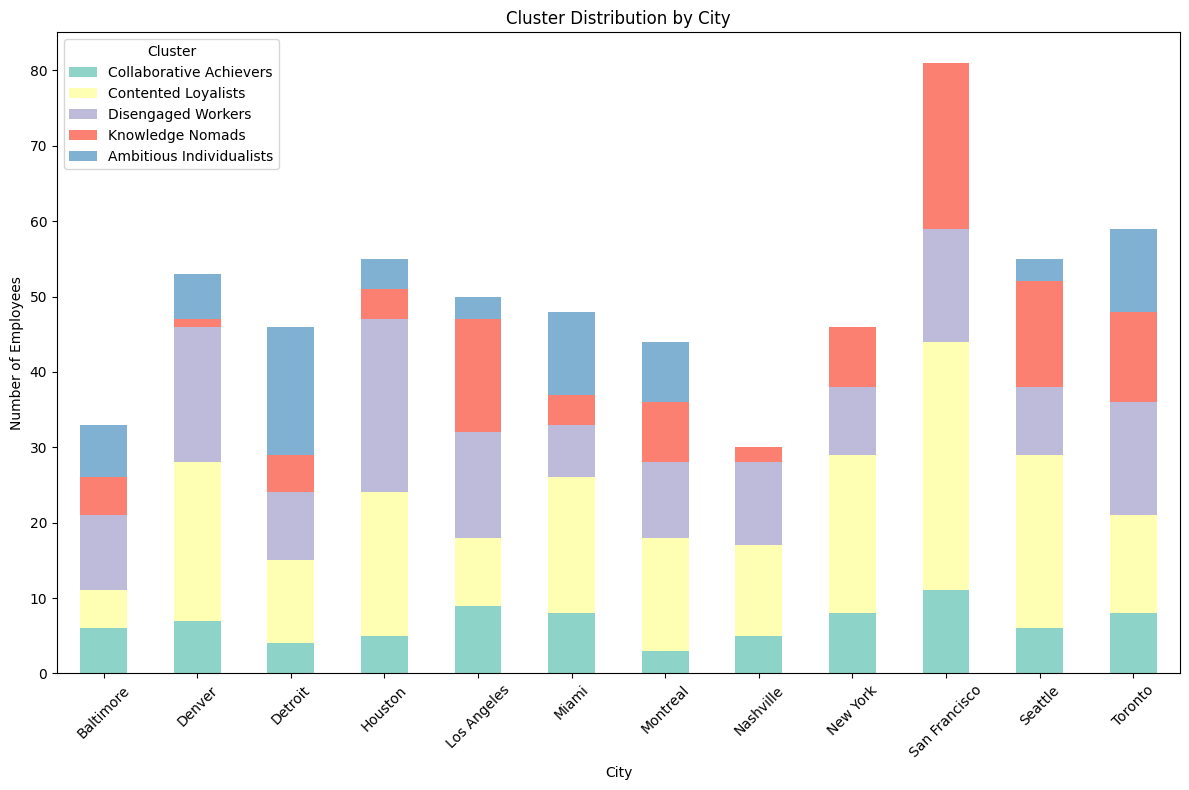

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
df = pd.read_csv("./clusters_locations.csv")

# 定义 Cluster 名称映射
cluster_names = {
    0: 'Collaborative Achievers',
    1: 'Contented Loyalists',
    2: 'Disengaged Workers',
    3: 'Knowledge Nomads',
    4: 'Ambitious Individualists'
}

# 替换 Cluster 列的值
df['Cluster'] = df['Cluster'].map(cluster_names)

# 计算每个城市中每个 Cluster 的数量
city_cluster_counts = df.groupby(['city', 'Cluster']).size().unstack(fill_value=0)

# 设置颜色调色板
colors = sns.color_palette("Set3", len(cluster_names))

# 绘制堆叠柱状图
city_cluster_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)

# 设置标签和标题
plt.title("Cluster Distribution by City")
plt.xlabel("City")
plt.ylabel("Number of Employees")
plt.legend(title="Cluster", labels=[f'{name}' for name in cluster_names.values()])
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
